## Imports and Dependencies

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import chainanalysis
import pickle

## Chain Analysis

In [2]:
simname = './220121_copoly_0.15epsAA_0.15epsAB_0.15epsBB_6.0rbAA_6.0rbBB_6.0rbAB_flex-1'
reader = chainanalysis.BondReader(simname)
reader.calc()

For remembering dictionary keys for BondReader methods:

In [3]:
print(reader.params.keys())
print(reader.params['size'])
print(reader.trajs.keys())

#note that frames[n] where n*100,000 is the timestep
print(reader.frames[0]['step'])
print(reader.frames[0].keys())
#print(reader.frames[-1]['seq'])

dict_keys(['name', 'inputdata', 'size', 'Nmono', 'epsAA', 'epsAB', 'epsBB', 'damp', 'angleA', 'angleB', 'angleKA', 'angleKB', 'shiftA', 'shiftB', 'Temp', 'epshard', 'activationAA', 'activationBB', 'activationAB', 'seed', 'numA', 'numB'])
50
dict_keys(['pAA', 'pBB', 'pAABB', 'pAB', 'PDI', 'extent', 'NumAve', 'MassAve', 'step', 'name'])
0
dict_keys(['pAA', 'pBB', 'pAABB', 'pAB', 'PDI', 'seq', 'numseq', 'chainends', 'monoAcount', 'monoBcount', 'extent', 'NumAve', 'MassAve', 'chaindist', 'blockAdist', 'blockBdist', 'blockAerror', 'blockBerror', 'step', 'name'])


## Manipulating Object Frames

In [4]:
probs = [reader.trajs['pAA'],reader.trajs['pBB'],reader.trajs['pAABB'],reader.trajs['pAB']]
PDI = np.array(reader.trajs['PDI'])
p = np.array(reader.trajs['extent'])
tstep = np.array(reader.trajs['step'])
ChainDist = reader.frames[-1]['chaindist']
BlockADist = reader.frames[-1]['blockAdist']
BlockBDist = reader.frames[-1]['blockBdist']
BlockAErr = reader.frames[-1]['blockAerror']
BlockBErr = reader.frames[-1]['blockBerror']


cnt=0
n = np.linspace(0,50,51)
TotalBlockXw = np.zeros((len(reader.trajs['PDI'])))
TotalBlockXn = np.zeros((len(reader.trajs['PDI'])))
Xn = np.zeros((len(reader.trajs['PDI'])))
BlockXw = np.zeros((len(reader.trajs['PDI'])))
BlockXn = np.zeros((len(reader.trajs['PDI'])))
BlockAXw = np.zeros((len(reader.trajs['PDI'])))
BlockAXn = np.zeros((len(reader.trajs['PDI'])))
BlockBXw = np.zeros((len(reader.trajs['PDI'])))
BlockBXn = np.zeros((len(reader.trajs['PDI'])))
for frame in reader.frames[:]:
    BlockTotal = np.zeros((len(n)))
    for id, val in enumerate(frame['blockAdist'][0]):
        BlockTotal[val] += frame['blockAdist'][1][id]
    for id, val in enumerate(frame['blockBdist'][0]):
        BlockTotal[val] += frame['blockBdist'][1][id]
    BlockAXw[cnt] = np.sum(np.array(frame['blockAdist'][0])*np.array(frame['blockAdist'][0])*np.array(frame['blockAdist'][1]))/np.sum(np.array(frame['blockAdist'][0])*np.array(frame['blockAdist'][1]))
    BlockAXn[cnt] = np.sum(np.array(frame['blockAdist'][0])*np.array(frame['blockAdist'][1]))/np.sum(np.array(frame['blockAdist'][1]))
    BlockBXw[cnt] = np.sum(np.array(frame['blockBdist'][0])*np.array(frame['blockBdist'][0])*np.array(frame['blockBdist'][1]))/np.sum(np.array(frame['blockBdist'][0])*np.array(frame['blockBdist'][1]))
    BlockBXn[cnt] = np.sum(np.array(frame['blockBdist'][0])*np.array(frame['blockBdist'][1]))/np.sum(np.array(frame['blockBdist'][1]))
    Xn[cnt] = np.sum(np.array(frame['chaindist'][0])*np.array(frame['chaindist'][1]))/np.sum(np.array(frame['chaindist'][1]))
    TotalBlockXw[cnt] = np.sum(n*n*BlockTotal)/np.sum(n*BlockTotal) 
    TotalBlockXn[cnt] = np.sum(n*BlockTotal)/np.sum(BlockTotal)
    cnt+=1
TotalBlock_PDI = np.array(TotalBlockXw/TotalBlockXn)        
BlockA_PDI = np.array(BlockAXw/BlockAXn)
BlockB_PDI = np.array(BlockBXw/BlockBXn)

In [5]:
# print(p[-1])
# #print(Carothers)
# print(len(p))
# print(len(tstep))
# print(TotalBlock_PDI)

## Reader Checkpoint

In [6]:
with open('./jar/'+simname+'_probs.pickle','wb') as f1:
    pickle.dump(probs,f1)
    
with open('./jar/'+simname+'_extent.pickle','wb') as f1:
    pickle.dump(p,f1)
    
with open('./jar/'+simname+'_tstep.pickle','wb') as f1:
    pickle.dump(tstep,f1)
    
with open('./jar/'+simname+'_PDI.pickle','wb') as f1:
    pickle.dump(PDI,f1)
    
with open('./jar/'+simname+'_DOP.pickle','wb') as f1:
    pickle.dump(Xn,f1)

with open('./jar/'+simname+'_BlockPDI.pickle','wb') as f1:
    pickle.dump(TotalBlock_PDI,f1)

with open('./jar/'+simname+'_BlockAPDI.pickle','wb') as f1:
    pickle.dump(BlockA_PDI,f1)
    
with open('./jar/'+simname+'_BlockBPDI.pickle','wb') as f1:
    pickle.dump(BlockB_PDI,f1)
    
with open('./jar/'+simname+'_BlockA.pickle','wb') as f1:
    pickle.dump(BlockADist,f1)
    
with open('./jar/'+simname+'_BlockB.pickle','wb') as f1:
    pickle.dump(BlockBDist,f1)
    
with open('./jar/'+simname+'_ChainDist.pickle','wb') as f1:
    pickle.dump(ChainDist,f1)

## Restart From Checkpoint

In [7]:
with open('./jar/'+simname+'_probs.pickle','rb') as f1:
    probs = pickle.load(f1)

with open('./jar/'+simname+'_extent.pickle','rb') as f1:
    p = pickle.load(f1)

with open('./jar/'+simname+'_tstep.pickle','rb') as f1:
    tstep = pickle.load(f1)
    
with open('./jar/'+simname+'_PDI.pickle','rb') as f1:
    PDI = pickle.load(f1)
    
with open('./jar/'+simname+'_DOP.pickle','rb') as f1:
    Xn = pickle.load(f1)
    
with open('./jar/'+simname+'_BlockPDI.pickle','rb') as f1:
    TotalBlock_PDI = pickle.load(f1)
    
with open('./jar/'+simname+'_BlockAPDI.pickle','rb') as f1:
    BlockA_PDI = pickle.load(f1)
    
with open('./jar/'+simname+'_BlockBPDI.pickle','rb') as f1:
    BlockB_PDI = pickle.load(f1)

with open('./jar/'+simname+'_BlockA.pickle','rb') as f1:
    BlockADist = pickle.load(f1)

with open('./jar/'+simname+'_BlockB.pickle','rb') as f1:
    BlockBDist = pickle.load(f1)

with open('./jar/'+simname+'_ChainDist.pickle','rb') as f1:
    ChainDist = pickle.load(f1)
    
    

## Single Simulation - Test Plotting

In [8]:
#n is the block length
n = np.linspace(0,np.amax(np.array((np.amax(BlockADist[0]),np.amax(BlockBDist[0]))))+1,np.amax(np.array((np.amax(BlockADist[0]),np.amax(BlockBDist[0]))))+2)
Markovian = (1-(p[-1]*probs[2][-1]))*(p[-1]*probs[2][-1])**(n-1)
Carothers = 1/(1-p[-1])
DOP = Xn[-1]



BlockDist = np.zeros(41)
for id, val in enumerate(BlockADist[0]):
    BlockDist[val] += BlockADist[1][id]
for id, val in enumerate(BlockBDist[0]):
    BlockDist[val] += BlockBDist[1][id]
print(BlockDist)

[0.00e+00 2.17e+03 9.15e+02 4.66e+02 1.94e+02 1.00e+02 4.70e+01 1.50e+01
 9.00e+00 4.00e+00 2.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00]


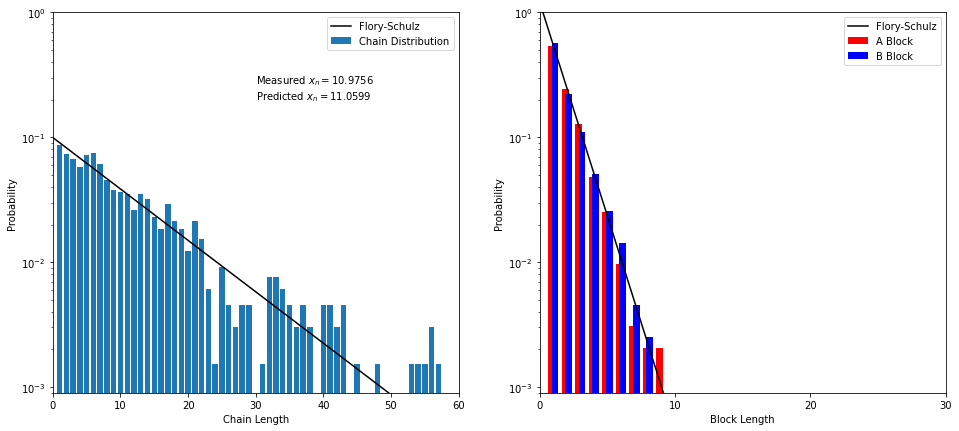

In [9]:
label = r'Measured $x_n =${:.4f}'.format(Xn[-1]) 
label += "\n"
label += r'Predicted $x_n =${:.4f}'.format(Carothers)
x_chain = np.linspace(0,50,51)
fig,ax = plt.subplots(1,2,figsize=(16,7))
ax[0].plot(x_chain, ((1-p[-1])*p[-1]**(x_chain-1)),'-k')
ax[0].bar(ChainDist[0],ChainDist[1]/np.sum(ChainDist[1]),align='center')
ax[0].set_xlabel('Chain Length')
ax[0].set_ylabel('Probability')
ax[0].set_xlim((0,60))
ax[0].set_yscale('log')
ax[0].set_ylim((9e-4,1))
ax[0].text(30,0.2,label)
ax[0].legend(('Flory-Schulz','Chain Distribution'))
barwidth=0.5;
ax[1].bar(np.array(BlockADist[0])-barwidth/4,BlockADist[1]/np.sum(BlockADist[1]),width=barwidth,align='center',color='red')
ax[1].bar(np.array(BlockBDist[0])+barwidth/4,BlockBDist[1]/np.sum(BlockBDist[1]),width=barwidth,align='center',color='blue')
ax[1].plot(n,Markovian,'-k')
ax[1].legend(('Markovian','A Block','B Block'))
ax[1].set_yscale('log')
ax[1].set_ylim((9e-4,1))
ax[1].set_xlim((0,30))
ax[1].set_xticks([0,10,20,30])
ax[1].set_xlabel('Block Length')
ax[1].set_ylabel('Probability');